In [25]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.lof import LOF
from pyod.models.ocsvm import OCSVM
from pyod.models.cblof import CBLOF
from pyod.models.hbos import HBOS

In [3]:
#import data set, dataset was downloaded from Kaggle:https://www.kaggle.com/datasets/hamidrezabakhtaki/fmcg-export-sale
df=pd.read_csv("ExportSales.csv",index_col=1,parse_dates=True)
df.head(2)

,ID,Category,Invoice Number,Product Code,Customer Code,Destenation,QTY,Total Price,Destination full name
Date,,,,,,,,,
2019-04-28,2529604,Category5,267,30011006,612,IRQ,750,3334.8225,Iraq
2019-04-29,2529605,Category5,302,30011006,514,BHR,400,3032.8240,Bahrain


In [4]:
#Sort index to be sure that dates are increasing, change data sequence to monthly basis,check if index is correct
df=df.sort_index(ascending=True)
df=df.resample('M').sum()
df.index

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', name='Date', freq='M')

In [5]:
#Selection needed columns
df_ts = df[["QTY"]]

In [7]:
# Create a numpy array from the data
X = np.array(df_ts)

In [8]:
# Fit the KNN model to the data
clf = KNN()
clf.fit(X)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [9]:
# Predict the outliers
y_pred = clf.predict(X)

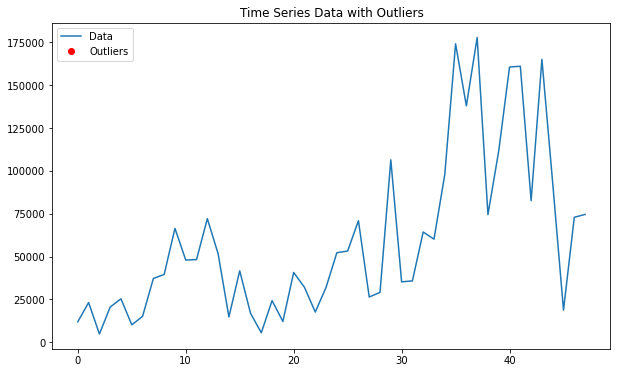

In [11]:
# Plot the time series data with the outliers highlighted in red
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(X, label='Data')
ax.plot(np.ma.masked_where(y_pred.flatten() == 0, X.flatten()), 'ro', label='Outliers')
ax.set_title('Time Series Data with Outliers')
ax.legend()
plt.show()

In [14]:
# create the Isolate Forest model
clf = IForest()
clf.fit(X)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [15]:
# predict on the test data
y_pred = clf.predict(X)

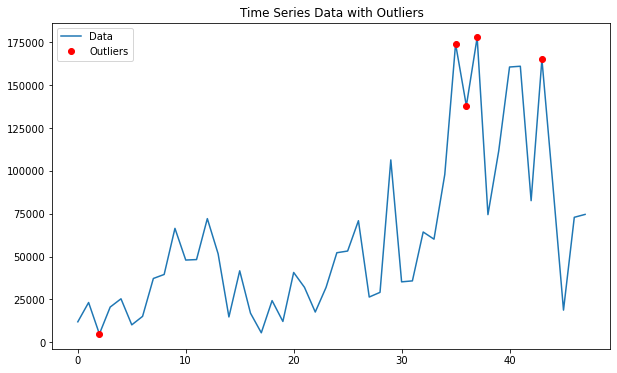

In [16]:
# Plot the time series data with the outliers highlighted in red
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(X, label='Data')
ax.plot(np.ma.masked_where(y_pred.flatten() == 0, X.flatten()), 'ro', label='Outliers')
ax.set_title('Time Series Data with Outliers')
ax.legend()
plt.show()

In [18]:
# create the Local Outlier Factor model
clf = LOF()
clf.fit(X)

LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2)

In [19]:
# predict on the test data
y_pred = clf.predict(X)

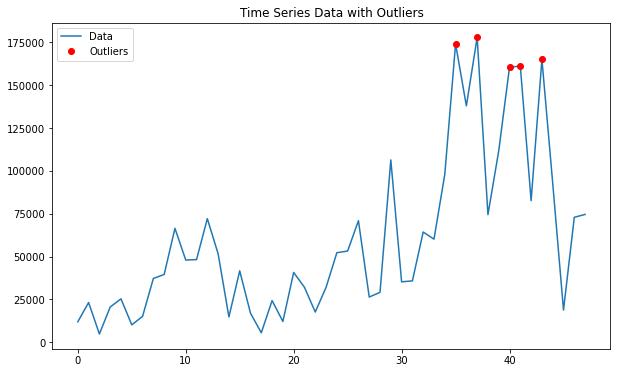

In [20]:
# Plot the time series data with the outliers highlighted in red
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(X, label='Data')
ax.plot(np.ma.masked_where(y_pred.flatten() == 0, X.flatten()), 'ro', label='Outliers')
ax.set_title('Time Series Data with Outliers')
ax.legend()
plt.show()

In [22]:
# create the One-Class SVM model
clf = OCSVM()
clf.fit(X)

OCSVM(cache_size=200, coef0=0.0, contamination=0.1, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)

In [23]:
# predict on the test data
y_pred = clf.predict(X)

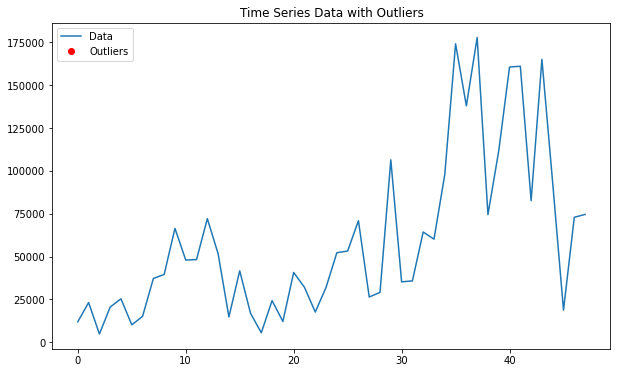

In [24]:
# Plot the time series data with the outliers highlighted in red
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(X, label='Data')
ax.plot(np.ma.masked_where(y_pred.flatten() == 0, X.flatten()), 'ro', label='Outliers')
ax.set_title('Time Series Data with Outliers')
ax.legend()
plt.show()

In [27]:
# create the Clustering-based Local Outlier Factor model
clf = CBLOF()
clf.fit(X)

In [28]:
# predict on the test data
y_pred = clf.predict(X)

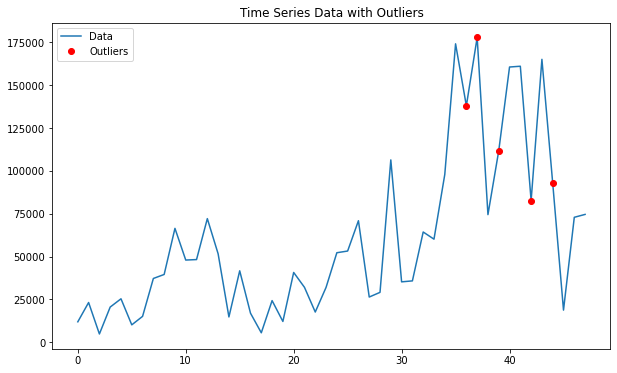

In [29]:
# Plot the time series data with the outliers highlighted in red
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(X, label='Data')
ax.plot(np.ma.masked_where(y_pred.flatten() == 0, X.flatten()), 'ro', label='Outliers')
ax.set_title('Time Series Data with Outliers')
ax.legend()
plt.show()

In [32]:
# create the Histogram-based Outlier Detection model
clf = HBOS()
clf.fit(X)

HBOS(alpha=0.1, contamination=0.1, n_bins=10, tol=0.5)

In [33]:
# predict on the test data
y_pred = clf.predict(X)

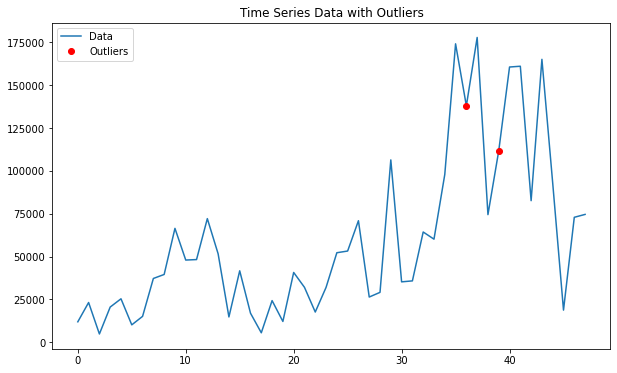

In [34]:
# Plot the time series data with the outliers highlighted in red
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(X, label='Data')
ax.plot(np.ma.masked_where(y_pred.flatten() == 0, X.flatten()), 'ro', label='Outliers')
ax.set_title('Time Series Data with Outliers')
ax.legend()
plt.show()